In [21]:
import IPython.display as ipd
filepath = "music-melodies/melody0.wav"
ipd.Audio(filepath)


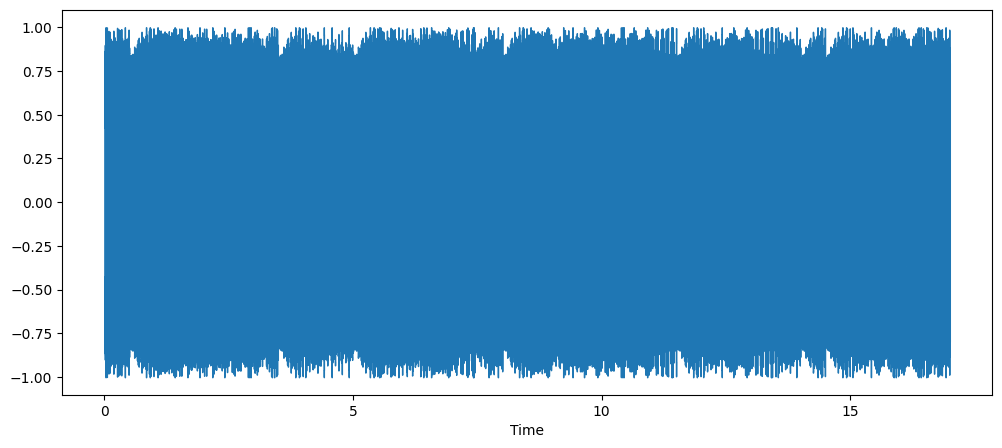

In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

In [23]:
from scipy.io import wavfile as wav
scipy_sample_rate, scipy_audio_data = wav.read(filepath)

librosa_audio_data, librosa_sample_rate = librosa.load(filepath) 

In [24]:
print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

Original sample rate: 44100
Librosa sample rate: 22050


In [25]:
import numpy as np
print('Original audio file min~max range:', np.min(scipy_audio_data), 'to', np.max(scipy_audio_data))
print('Librosa audio file min~max range:', np.min(librosa_audio_data), 'to', np.max(librosa_audio_data))

Original audio file min~max range: -1.0 to 1.0
Librosa audio file min~max range: -1.0000005 to 1.0000005


In [26]:
scipy_audio_data

array([ 0.02981618,  0.07587282,  0.12143092, ..., -0.25667037,
       -0.24604874, -0.23435115])

In [27]:
librosa_audio_data

array([ 0.03014075,  0.12192558,  0.20995355, ..., -0.28127137,
       -0.2638801 , -0.25540197], dtype=float32)

In [28]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=50)
print(mfccs.shape)

(50, 733)


In [29]:
mfccs

array([[-205.23726  , -247.23001  , -384.40738  , ..., -384.35788  ,
        -222.22774  , -146.95808  ],
       [ 219.29288  ,  215.36328  ,  112.50063  , ...,  112.56906  ,
         159.98386  ,  146.05447  ],
       [  28.692108 ,   46.46026  ,   52.023766 , ...,   52.088234 ,
          49.63559  ,   45.86243  ],
       ...,
       [  -8.363162 ,  -10.941272 ,  -15.319845 , ...,  -15.282051 ,
          -9.053744 ,   -4.801528 ],
       [  -8.126448 ,  -12.55155  ,  -24.26992  , ...,  -24.228718 ,
         -13.372679 ,   -7.797161 ],
       [  -5.760854 ,   -9.041397 ,  -14.940116 , ...,  -14.897469 ,
         -10.493044 ,   -6.8508043]], dtype=float32)

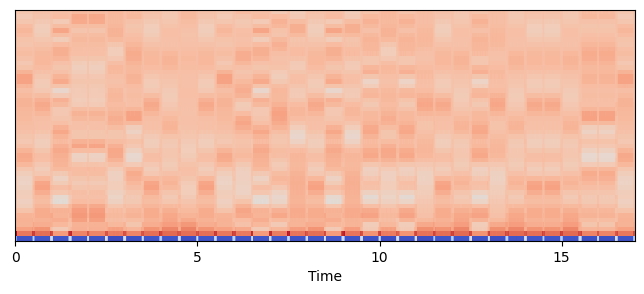

In [76]:
import librosa.display
plt.figure(figsize=(8,3))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')

In [31]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [32]:
import pandas as pd
audio_dataset_path = 'C:/Users/JVS Tanish/Downloads/MidMinorProject/music-melodies'
audio_dataframe = pd.read_csv('wavefiles.csv')
audio_dataframe

file_name  classID             label
0        melody0.wav        1         antiviral
1        melody1.wav        1         antiviral
2        melody2.wav        1         antiviral
3        melody3.wav        1         antiviral
4        melody4.wav        1         antiviral
...              ...      ...               ...
1698  melody1698.wav        4  anti-coronavirus
1699  melody1699.wav        4  anti-coronavirus
1700  melody1700.wav        4  anti-coronavirus
1701  melody1701.wav        4  anti-coronavirus
1702  melody1702.wav        4  anti-coronavirus

[1703 rows x 3 columns]

In [33]:
import numpy as np
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(audio_dataframe.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"]))
    final_class_labels=row["label"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1703it [03:40,  7.71it/s]


In [34]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature      class
0  [-352.1201, 117.50465, 42.976284, 21.657383, 2...  antiviral
1  [-352.5883, 117.98771, 45.68503, 24.281664, 23...  antiviral
2  [-352.17352, 117.25305, 42.967205, 21.374035, ...  antiviral
3  [-353.6446, 120.68121, 50.46589, 25.307032, 21...  antiviral
4  [-352.62195, 117.5211, 43.80404, 22.306286, 22...  antiviral

In [35]:
extracted_features_df['feature'][0].shape

(50,)

In [36]:
extracted_features[1]

[array([-352.5883    ,  117.98771   ,   45.68503   ,   24.281664  ,
          23.62631   ,   30.358662  ,   23.025948  ,    3.9706025 ,
         -19.827929  ,  -21.709972  ,  -10.1099415 ,    1.4623717 ,
          -1.2498314 ,   -7.6970577 ,  -14.429745  ,  -14.058751  ,
          -8.561169  ,    1.2966509 ,    6.674561  ,    6.3377056 ,
          -2.1787527 ,  -10.389683  ,   -9.308966  ,   -0.65399045,
           4.4804583 ,    5.8024707 ,    7.647348  ,    8.710619  ,
           7.331387  ,    6.7594757 ,    6.1801777 ,   -0.8358539 ,
          -8.932109  ,   -9.60679   ,   -5.0845137 ,   -1.3459959 ,
           1.3474613 ,    1.1551269 ,    1.4096894 ,    4.1698294 ,
           6.3187137 ,    4.82189   ,    0.94317204,   -2.4994242 ,
          -0.79003674,    0.7538882 ,   -2.0292773 ,   -2.914387  ,
          -1.5563642 ,   -3.5121248 ], dtype=float32),
 'antiviral']

In [37]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [38]:
print(X)
print(X.shape)

[[-352.1201     117.50465     42.976284  ...   -4.181921    -2.3553898
    -4.5300717]
 [-352.5883     117.98771     45.68503   ...   -2.914387    -1.5563642
    -3.5121248]
 [-352.17352    117.25305     42.967205  ...   -3.4841604   -1.4404352
    -3.7319343]
 ...
 [-353.11194    112.5843      35.339336  ...   -3.6455371    3.4532158
     1.7475227]
 [-356.99905    121.96512     56.90936   ...   -0.904176     1.5036601
     2.4718668]
 [-353.2467     111.22525     30.959944  ...   -5.4703746    2.134857
     1.679723 ]]
(1703, 50)


In [39]:
y

array(['antiviral', 'antiviral', 'antiviral', ..., 'anti-coronavirus',
       'anti-coronavirus', 'anti-coronavirus'], dtype='<U24')

In [40]:
y[0]

'antiviral'

In [41]:
### Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_new=to_categorical(labelencoder.fit_transform(y))

In [42]:
y_new[0]

array([0., 1., 0., 0.], dtype=float32)

In [51]:
y_new.shape

(1703, 4)

In [43]:
y_new

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [44]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_new,test_size=0.2,random_state=42,shuffle=True)

In [45]:
X_train

array([[-3.5082233e+02,  1.1045226e+02,  2.8519442e+01, ...,
         6.1302323e+00,  1.1467762e+01,  3.5623832e+00],
       [-3.5481143e+02,  1.1907060e+02,  4.7021080e+01, ...,
         2.3674219e+00,  3.9500282e+00, -3.4850526e-01],
       [-3.5261111e+02,  1.2106283e+02,  5.0656094e+01, ...,
        -2.7861404e+00, -1.9460269e+00, -5.1914287e+00],
       ...,
       [-3.5349371e+02,  1.1676073e+02,  4.1880890e+01, ...,
        -4.8704991e+00, -9.9224798e-02, -1.7299310e+00],
       [-3.5384839e+02,  1.1729266e+02,  4.5105057e+01, ...,
         1.9322766e+00,  4.1204305e+00,  9.9168098e-01],
       [-3.5153897e+02,  1.0868219e+02,  2.9446362e+01, ...,
        -1.0225407e+01,  2.7139902e+00,  1.7466096e+00]], dtype=float32)

# ANN Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [52]:
### No of classes
output_labels=y_new.shape[1]
output_labels

4

In [70]:
ANN_model=Sequential()
###first layer
ANN_model.add(Dense(100,input_shape=(50,)))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
###second layer
ANN_model.add(Dense(200))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
###third layer
ANN_model.add(Dense(100))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
###final layer
ANN_model.add(Dense(output_labels))
ANN_model.add(Activation('softmax'))

In [71]:
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               5100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [72]:
ANN_model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [73]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 500
num_batch_size = 128
ANN_checkpointer = ModelCheckpoint(filepath='models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
ANN_Model = ANN_model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[ANN_checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
 1/11 [=>............................] - ETA: 3s - loss: 53.1841 - accuracy: 0.1562
Epoch 1: val_loss improved from inf to 4.60844, saving model to models\audio_classification.hdf5
11/11 [==============================] - 1s 19ms/step - loss: 36.7725 - accuracy: 0.2805 - val_loss: 4.6084 - val_accuracy: 0.3578
Epoch 2/500
11/11 [==============================] - ETA: 0s - loss: 19.9757 - accuracy: 0.3194
Epoch 2: val_loss improved from 4.60844 to 3.24872, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 11ms/step - loss: 19.9757 - accuracy: 0.3194 - val_loss: 3.2487 - val_accuracy: 0.3372
Epoch 3/500
10/11 [==========================>...] - ETA: 0s - loss: 11.3085 - accuracy: 0.3031
Epoch 3: val_loss improved from 3.24872 to 2.05669, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 12ms/step - loss: 11.0912 - accuracy: 0.3084 - val_loss: 2.0567 - val_accuracy: 0.3372
Epoch 4/500
10/11 [=

11/11 [==============================] - 0s 12ms/step - loss: 1.3535 - accuracy: 0.3495 - val_loss: 1.2850 - val_accuracy: 0.3343
Epoch 28/500
11/11 [==============================] - ETA: 0s - loss: 1.3443 - accuracy: 0.3488
Epoch 28: val_loss did not improve from 1.28501
11/11 [==============================] - 0s 9ms/step - loss: 1.3443 - accuracy: 0.3488 - val_loss: 1.2863 - val_accuracy: 0.3343
Epoch 29/500
10/11 [==========================>...] - ETA: 0s - loss: 1.3523 - accuracy: 0.3602
Epoch 29: val_loss did not improve from 1.28501
11/11 [==============================] - 0s 8ms/step - loss: 1.3552 - accuracy: 0.3561 - val_loss: 1.2886 - val_accuracy: 0.3343
Epoch 30/500
11/11 [==============================] - ETA: 0s - loss: 1.3327 - accuracy: 0.3488
Epoch 30: val_loss did not improve from 1.28501
11/11 [==============================] - 0s 9ms/step - loss: 1.3327 - accuracy: 0.3488 - val_loss: 1.2868 - val_accuracy: 0.3343
Epoch 31/500
 1/11 [=>............................]

11/11 [==============================] - ETA: 0s - loss: 1.2906 - accuracy: 0.3539
Epoch 55: val_loss did not improve from 1.26609
11/11 [==============================] - 0s 9ms/step - loss: 1.2906 - accuracy: 0.3539 - val_loss: 1.2682 - val_accuracy: 0.3343
Epoch 56/500
 1/11 [=>............................] - ETA: 0s - loss: 1.3285 - accuracy: 0.3281
Epoch 56: val_loss did not improve from 1.26609
11/11 [==============================] - 0s 7ms/step - loss: 1.2795 - accuracy: 0.3546 - val_loss: 1.2706 - val_accuracy: 0.3343
Epoch 57/500
 1/11 [=>............................] - ETA: 0s - loss: 1.2821 - accuracy: 0.4141
Epoch 57: val_loss did not improve from 1.26609
11/11 [==============================] - 0s 8ms/step - loss: 1.2808 - accuracy: 0.3583 - val_loss: 1.2695 - val_accuracy: 0.3343
Epoch 58/500
 1/11 [=>............................] - ETA: 0s - loss: 1.2506 - accuracy: 0.3594
Epoch 58: val_loss did not improve from 1.26609
11/11 [==============================] - 0s 8ms/st

Epoch 84/500
11/11 [==============================] - ETA: 0s - loss: 1.2461 - accuracy: 0.3979
Epoch 84: val_loss improved from 1.25599 to 1.25566, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 1.2461 - accuracy: 0.3979 - val_loss: 1.2557 - val_accuracy: 0.3666
Epoch 85/500
 1/11 [=>............................] - ETA: 0s - loss: 1.2538 - accuracy: 0.3984
Epoch 85: val_loss improved from 1.25566 to 1.25075, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 9ms/step - loss: 1.2587 - accuracy: 0.3796 - val_loss: 1.2508 - val_accuracy: 0.3930
Epoch 86/500
 1/11 [=>............................] - ETA: 0s - loss: 1.3190 - accuracy: 0.3281
Epoch 86: val_loss improved from 1.25075 to 1.25021, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 9ms/step - loss: 1.2460 - accuracy: 0.3781 - val_loss: 1.2502 - val_accuracy: 0.3754
Epoch 87/500
 1/11

 1/11 [=>............................] - ETA: 0s - loss: 1.1557 - accuracy: 0.5234
Epoch 110: val_loss improved from 1.19416 to 1.18604, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 1.1958 - accuracy: 0.4537 - val_loss: 1.1860 - val_accuracy: 0.4868
Epoch 111/500
 1/11 [=>............................] - ETA: 0s - loss: 1.1685 - accuracy: 0.3984
Epoch 111: val_loss improved from 1.18604 to 1.17785, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 1.2019 - accuracy: 0.4302 - val_loss: 1.1779 - val_accuracy: 0.5044
Epoch 112/500
11/11 [==============================] - ETA: 0s - loss: 1.1933 - accuracy: 0.4604
Epoch 112: val_loss did not improve from 1.17785
11/11 [==============================] - 0s 9ms/step - loss: 1.1933 - accuracy: 0.4604 - val_loss: 1.1827 - val_accuracy: 0.4809
Epoch 113/500
 1/11 [=>............................] - ETA: 0s - loss: 1.1678 -

10/11 [==========================>...] - ETA: 0s - loss: 1.1434 - accuracy: 0.5023
Epoch 138: val_loss did not improve from 1.12131
11/11 [==============================] - 0s 9ms/step - loss: 1.1401 - accuracy: 0.5022 - val_loss: 1.1271 - val_accuracy: 0.5337
Epoch 139/500
 1/11 [=>............................] - ETA: 0s - loss: 1.0436 - accuracy: 0.5469
Epoch 139: val_loss improved from 1.12131 to 1.11756, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 9ms/step - loss: 1.1384 - accuracy: 0.4949 - val_loss: 1.1176 - val_accuracy: 0.5425
Epoch 140/500
11/11 [==============================] - ETA: 0s - loss: 1.1383 - accuracy: 0.4985
Epoch 140: val_loss did not improve from 1.11756
11/11 [==============================] - 0s 9ms/step - loss: 1.1383 - accuracy: 0.4985 - val_loss: 1.1265 - val_accuracy: 0.5337
Epoch 141/500
 1/11 [=>............................] - ETA: 0s - loss: 1.1616 - accuracy: 0.4688
Epoch 141: val_loss did not improve fr

11/11 [==============================] - ETA: 0s - loss: 1.0773 - accuracy: 0.5448
Epoch 166: val_loss improved from 1.07975 to 1.06715, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 1.0773 - accuracy: 0.5448 - val_loss: 1.0671 - val_accuracy: 0.5748
Epoch 167/500
 1/11 [=>............................] - ETA: 0s - loss: 1.1261 - accuracy: 0.5469
Epoch 167: val_loss improved from 1.06715 to 1.06599, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 1.0973 - accuracy: 0.5463 - val_loss: 1.0660 - val_accuracy: 0.5982
Epoch 168/500
 1/11 [=>............................] - ETA: 0s - loss: 1.1531 - accuracy: 0.5234
Epoch 168: val_loss did not improve from 1.06599
11/11 [==============================] - 0s 7ms/step - loss: 1.0809 - accuracy: 0.5521 - val_loss: 1.0749 - val_accuracy: 0.5894
Epoch 169/500
11/11 [==============================] - ETA: 0s - loss: 1.0818 -

11/11 [==============================] - ETA: 0s - loss: 1.0591 - accuracy: 0.5698
Epoch 194: val_loss did not improve from 1.02027
11/11 [==============================] - 0s 8ms/step - loss: 1.0591 - accuracy: 0.5698 - val_loss: 1.0377 - val_accuracy: 0.6041
Epoch 195/500
 1/11 [=>............................] - ETA: 0s - loss: 1.0352 - accuracy: 0.5625
Epoch 195: val_loss did not improve from 1.02027
11/11 [==============================] - 0s 7ms/step - loss: 1.0511 - accuracy: 0.5529 - val_loss: 1.0295 - val_accuracy: 0.6012
Epoch 196/500
 1/11 [=>............................] - ETA: 0s - loss: 1.0344 - accuracy: 0.5391
Epoch 196: val_loss did not improve from 1.02027
11/11 [==============================] - 0s 7ms/step - loss: 1.0373 - accuracy: 0.5764 - val_loss: 1.0230 - val_accuracy: 0.5982
Epoch 197/500
 1/11 [=>............................] - ETA: 0s - loss: 1.0372 - accuracy: 0.5859
Epoch 197: val_loss did not improve from 1.02027
11/11 [==============================] - 0s

11/11 [==============================] - ETA: 0s - loss: 1.0288 - accuracy: 0.5683
Epoch 223: val_loss did not improve from 1.00533
11/11 [==============================] - 0s 8ms/step - loss: 1.0288 - accuracy: 0.5683 - val_loss: 1.0166 - val_accuracy: 0.6100
Epoch 224/500
 1/11 [=>............................] - ETA: 0s - loss: 1.0657 - accuracy: 0.5469
Epoch 224: val_loss did not improve from 1.00533
11/11 [==============================] - 0s 7ms/step - loss: 1.0193 - accuracy: 0.5602 - val_loss: 1.0197 - val_accuracy: 0.5982
Epoch 225/500
11/11 [==============================] - ETA: 0s - loss: 1.0057 - accuracy: 0.5756
Epoch 225: val_loss improved from 1.00533 to 0.99774, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 1.0057 - accuracy: 0.5756 - val_loss: 0.9977 - val_accuracy: 0.6100
Epoch 226/500
11/11 [==============================] - ETA: 0s - loss: 1.0237 - accuracy: 0.5712
Epoch 226: val_loss did not improve f

Epoch 252/500
 1/11 [=>............................] - ETA: 0s - loss: 1.1014 - accuracy: 0.4844
Epoch 252: val_loss did not improve from 0.96764
11/11 [==============================] - 0s 7ms/step - loss: 0.9754 - accuracy: 0.5947 - val_loss: 0.9813 - val_accuracy: 0.6188
Epoch 253/500
 1/11 [=>............................] - ETA: 0s - loss: 0.8750 - accuracy: 0.6328
Epoch 253: val_loss did not improve from 0.96764
11/11 [==============================] - 0s 7ms/step - loss: 0.9797 - accuracy: 0.5859 - val_loss: 0.9847 - val_accuracy: 0.6246
Epoch 254/500
11/11 [==============================] - ETA: 0s - loss: 1.0111 - accuracy: 0.5808
Epoch 254: val_loss did not improve from 0.96764
11/11 [==============================] - 0s 8ms/step - loss: 1.0111 - accuracy: 0.5808 - val_loss: 0.9793 - val_accuracy: 0.6217
Epoch 255/500
 1/11 [=>............................] - ETA: 0s - loss: 0.9956 - accuracy: 0.5781
Epoch 255: val_loss did not improve from 0.96764
11/11 [======================

Epoch 281/500
 1/11 [=>............................] - ETA: 0s - loss: 1.0527 - accuracy: 0.6016
Epoch 281: val_loss did not improve from 0.95629
11/11 [==============================] - 0s 7ms/step - loss: 0.9815 - accuracy: 0.6043 - val_loss: 0.9567 - val_accuracy: 0.6276
Epoch 282/500
11/11 [==============================] - ETA: 0s - loss: 0.9540 - accuracy: 0.6065
Epoch 282: val_loss improved from 0.95629 to 0.95422, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 11ms/step - loss: 0.9540 - accuracy: 0.6065 - val_loss: 0.9542 - val_accuracy: 0.6246
Epoch 283/500
11/11 [==============================] - ETA: 0s - loss: 0.9647 - accuracy: 0.6065
Epoch 283: val_loss did not improve from 0.95422
11/11 [==============================] - 0s 8ms/step - loss: 0.9647 - accuracy: 0.6065 - val_loss: 0.9571 - val_accuracy: 0.6305
Epoch 284/500
 1/11 [=>............................] - ETA: 0s - loss: 0.9070 - accuracy: 0.6172
Epoch 284: val_loss did

Epoch 310/500
11/11 [==============================] - ETA: 0s - loss: 0.9498 - accuracy: 0.6116
Epoch 310: val_loss did not improve from 0.93581
11/11 [==============================] - 0s 9ms/step - loss: 0.9498 - accuracy: 0.6116 - val_loss: 0.9578 - val_accuracy: 0.6217
Epoch 311/500
 1/11 [=>............................] - ETA: 0s - loss: 0.8750 - accuracy: 0.6328
Epoch 311: val_loss did not improve from 0.93581
11/11 [==============================] - 0s 8ms/step - loss: 0.9163 - accuracy: 0.6336 - val_loss: 0.9595 - val_accuracy: 0.6158
Epoch 312/500
 1/11 [=>............................] - ETA: 0s - loss: 1.0288 - accuracy: 0.5781
Epoch 312: val_loss did not improve from 0.93581
11/11 [==============================] - 0s 8ms/step - loss: 0.9571 - accuracy: 0.6079 - val_loss: 0.9646 - val_accuracy: 0.6305
Epoch 313/500
11/11 [==============================] - ETA: 0s - loss: 0.9713 - accuracy: 0.5991
Epoch 313: val_loss did not improve from 0.93581
11/11 [======================

11/11 [==============================] - ETA: 0s - loss: 0.8980 - accuracy: 0.6373
Epoch 339: val_loss improved from 0.92426 to 0.92088, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 11ms/step - loss: 0.8980 - accuracy: 0.6373 - val_loss: 0.9209 - val_accuracy: 0.6158
Epoch 340/500
 1/11 [=>............................] - ETA: 0s - loss: 0.8250 - accuracy: 0.6875
Epoch 340: val_loss did not improve from 0.92088
11/11 [==============================] - 0s 8ms/step - loss: 0.9160 - accuracy: 0.6204 - val_loss: 0.9219 - val_accuracy: 0.6305
Epoch 341/500
10/11 [==========================>...] - ETA: 0s - loss: 0.9047 - accuracy: 0.6289
Epoch 341: val_loss did not improve from 0.92088
11/11 [==============================] - 0s 9ms/step - loss: 0.9124 - accuracy: 0.6219 - val_loss: 0.9343 - val_accuracy: 0.6305
Epoch 342/500
 1/11 [=>............................] - ETA: 0s - loss: 0.9823 - accuracy: 0.5938
Epoch 342: val_loss did not improve f

 1/11 [=>............................] - ETA: 0s - loss: 0.8989 - accuracy: 0.6328
Epoch 368: val_loss improved from 0.91921 to 0.91844, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 0.8883 - accuracy: 0.6292 - val_loss: 0.9184 - val_accuracy: 0.6217
Epoch 369/500
 1/11 [=>............................] - ETA: 0s - loss: 0.8603 - accuracy: 0.6719
Epoch 369: val_loss improved from 0.91844 to 0.90885, saving model to models\audio_classification.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 0.8976 - accuracy: 0.6307 - val_loss: 0.9088 - val_accuracy: 0.6364
Epoch 370/500
10/11 [==========================>...] - ETA: 0s - loss: 0.9102 - accuracy: 0.6344
Epoch 370: val_loss did not improve from 0.90885
11/11 [==============================] - 0s 10ms/step - loss: 0.9121 - accuracy: 0.6344 - val_loss: 0.9131 - val_accuracy: 0.6217
Epoch 371/500
10/11 [==========================>...] - ETA: 0s - loss: 0.8888 

 1/11 [=>............................] - ETA: 0s - loss: 0.8274 - accuracy: 0.6250
Epoch 397: val_loss did not improve from 0.90662
11/11 [==============================] - 0s 8ms/step - loss: 0.8977 - accuracy: 0.6307 - val_loss: 0.9192 - val_accuracy: 0.6188
Epoch 398/500
 1/11 [=>............................] - ETA: 0s - loss: 0.8245 - accuracy: 0.6875
Epoch 398: val_loss did not improve from 0.90662
11/11 [==============================] - 0s 8ms/step - loss: 0.8844 - accuracy: 0.6285 - val_loss: 0.9157 - val_accuracy: 0.6334
Epoch 399/500
10/11 [==========================>...] - ETA: 0s - loss: 0.8985 - accuracy: 0.6406
Epoch 399: val_loss did not improve from 0.90662
11/11 [==============================] - 0s 9ms/step - loss: 0.8899 - accuracy: 0.6439 - val_loss: 0.9216 - val_accuracy: 0.6364
Epoch 400/500
 1/11 [=>............................] - ETA: 0s - loss: 0.8501 - accuracy: 0.6406
Epoch 400: val_loss did not improve from 0.90662
11/11 [==============================] - 0s

Epoch 427/500
11/11 [==============================] - ETA: 0s - loss: 0.8522 - accuracy: 0.6512
Epoch 427: val_loss did not improve from 0.89069
11/11 [==============================] - 0s 9ms/step - loss: 0.8522 - accuracy: 0.6512 - val_loss: 0.9074 - val_accuracy: 0.6422
Epoch 428/500
 1/11 [=>............................] - ETA: 0s - loss: 0.7661 - accuracy: 0.6953
Epoch 428: val_loss did not improve from 0.89069
11/11 [==============================] - 0s 7ms/step - loss: 0.8733 - accuracy: 0.6498 - val_loss: 0.9136 - val_accuracy: 0.6334
Epoch 429/500
 1/11 [=>............................] - ETA: 0s - loss: 0.8822 - accuracy: 0.6641
Epoch 429: val_loss did not improve from 0.89069
11/11 [==============================] - 0s 7ms/step - loss: 0.8591 - accuracy: 0.6586 - val_loss: 0.9217 - val_accuracy: 0.6276
Epoch 430/500
 1/11 [=>............................] - ETA: 0s - loss: 0.9874 - accuracy: 0.5625
Epoch 430: val_loss did not improve from 0.89069
11/11 [======================

Epoch 457/500
 1/11 [=>............................] - ETA: 0s - loss: 0.8922 - accuracy: 0.6328
Epoch 457: val_loss did not improve from 0.89069
11/11 [==============================] - 0s 7ms/step - loss: 0.8734 - accuracy: 0.6520 - val_loss: 0.9277 - val_accuracy: 0.6305
Epoch 458/500
10/11 [==========================>...] - ETA: 0s - loss: 0.8510 - accuracy: 0.6531
Epoch 458: val_loss did not improve from 0.89069
11/11 [==============================] - 0s 9ms/step - loss: 0.8527 - accuracy: 0.6520 - val_loss: 0.9197 - val_accuracy: 0.6364
Epoch 459/500
 1/11 [=>............................] - ETA: 0s - loss: 0.9608 - accuracy: 0.6172
Epoch 459: val_loss did not improve from 0.89069
11/11 [==============================] - 0s 8ms/step - loss: 0.8615 - accuracy: 0.6527 - val_loss: 0.9028 - val_accuracy: 0.6364
Epoch 460/500
 1/11 [=>............................] - ETA: 0s - loss: 0.9397 - accuracy: 0.6484
Epoch 460: val_loss did not improve from 0.89069
11/11 [======================

11/11 [==============================] - 0s 8ms/step - loss: 0.8501 - accuracy: 0.6586 - val_loss: 0.9271 - val_accuracy: 0.6481
Epoch 487/500
 1/11 [=>............................] - ETA: 0s - loss: 0.7947 - accuracy: 0.7031
Epoch 487: val_loss did not improve from 0.88942
11/11 [==============================] - 0s 8ms/step - loss: 0.8486 - accuracy: 0.6571 - val_loss: 0.9127 - val_accuracy: 0.6393
Epoch 488/500
 1/11 [=>............................] - ETA: 0s - loss: 0.7422 - accuracy: 0.7344
Epoch 488: val_loss did not improve from 0.88942
11/11 [==============================] - 0s 7ms/step - loss: 0.8480 - accuracy: 0.6446 - val_loss: 0.8945 - val_accuracy: 0.6481
Epoch 489/500
 1/11 [=>............................] - ETA: 0s - loss: 0.7617 - accuracy: 0.6875
Epoch 489: val_loss did not improve from 0.88942
11/11 [==============================] - 0s 7ms/step - loss: 0.8649 - accuracy: 0.6505 - val_loss: 0.8923 - val_accuracy: 0.6334
Epoch 490/500
 1/11 [=>.......................

In [74]:
# Model accuracy on the train and test data set
train_accuracy = ANN_model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy of ANN: ", train_accuracy[1])

test_accuracy = ANN_model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy of ANN: ", test_accuracy[1])

Training Accuracy of ANN:  0.7232011556625366
Testing Accuracy of ANN:  0.6275659799575806


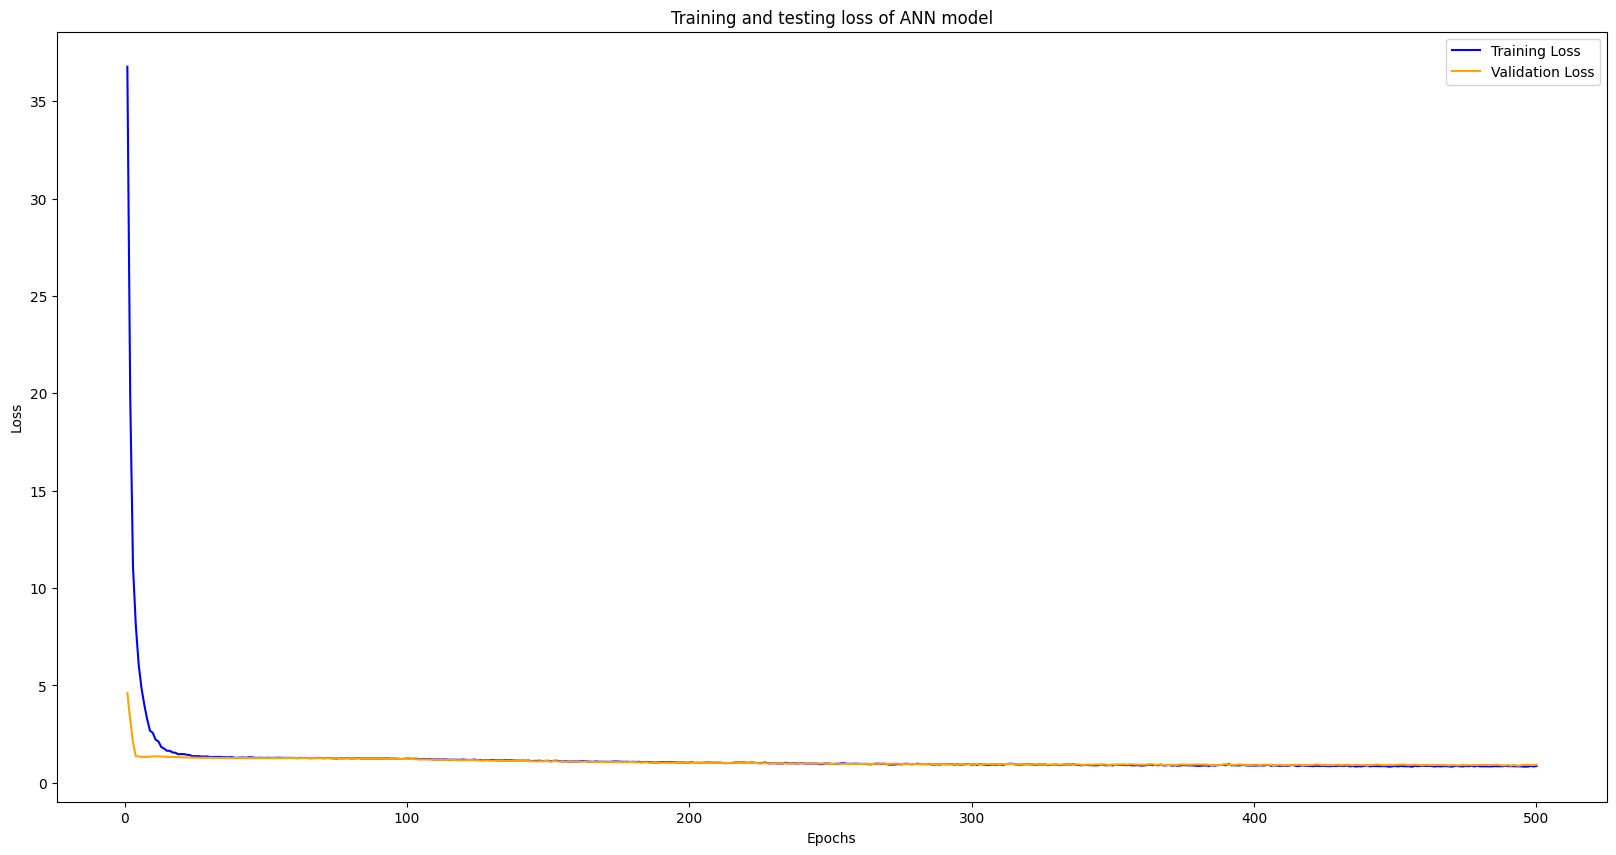

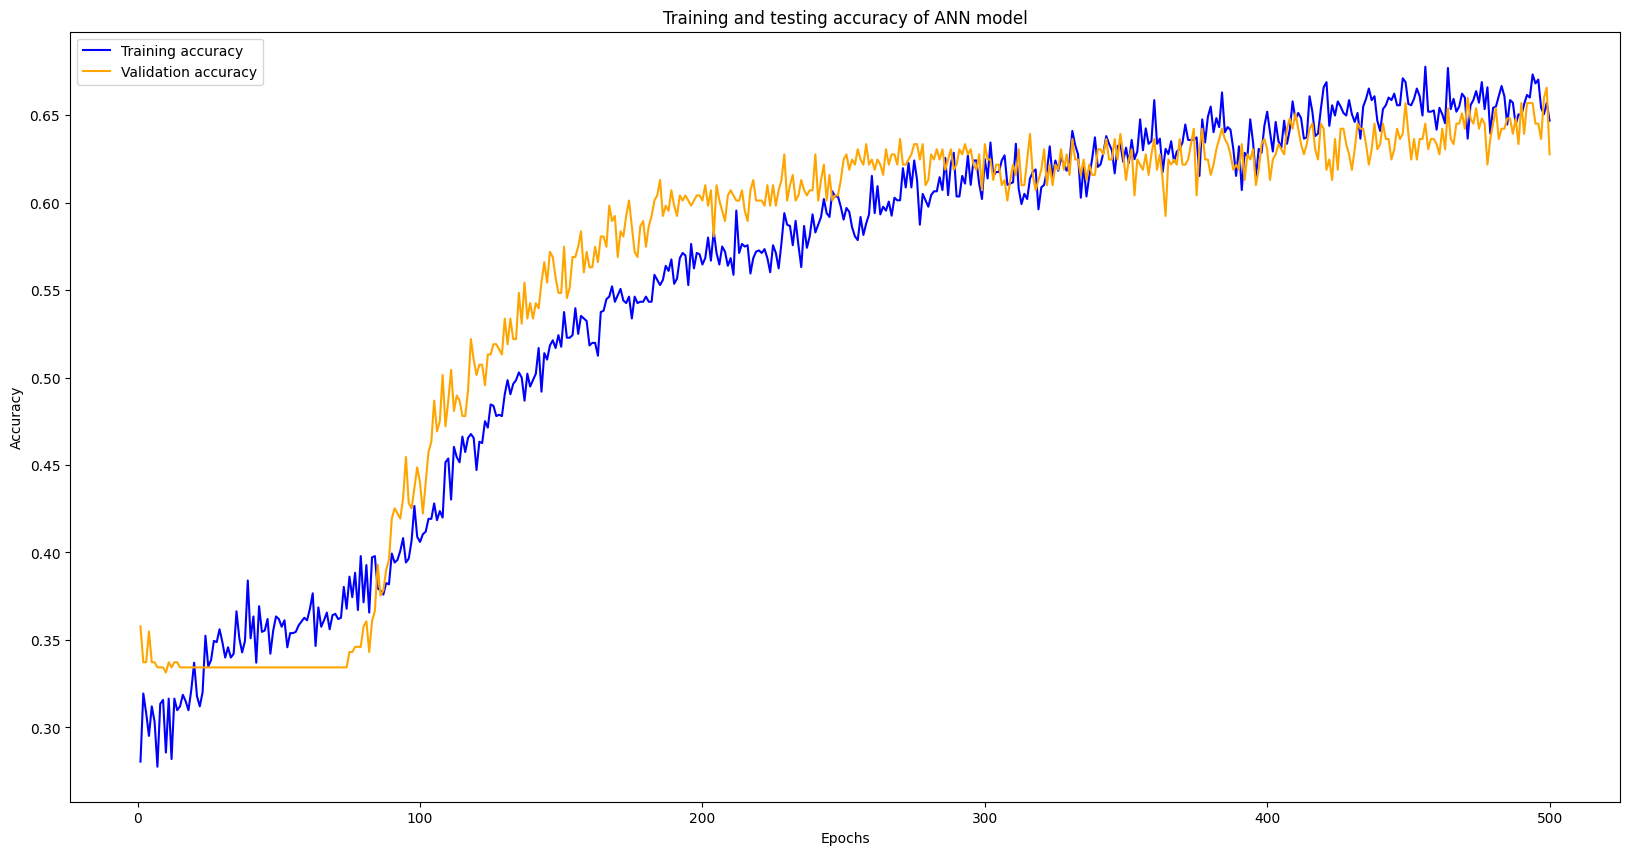

In [75]:
history_dict=ANN_Model.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,501)

plt.figure(1,figsize=(20,10))
plt.plot(epochs,loss_values,'blue',label='Training Loss')
plt.plot(epochs,val_loss_values,'orange', label='Validation Loss')
plt.title('Training and testing loss of ANN model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2,figsize=(20,10))
plt.plot(epochs,acc_values,'blue', label='Training accuracy')
plt.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
plt.title('Training and testing accuracy of ANN model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
ANN_model.save('saved_models/ANN_model')

INFO:tensorflow:Assets written to: saved_models/ANN_model\assets


In [60]:
import tensorflow as tf
ANN_model=tf.keras.models.load_model('saved_models/ANN_model')

In [61]:
y_pred = ANN_model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [62]:
y_pred

array([[1.9049320e-03, 4.8429063e-03, 1.4699593e-01, 8.4625626e-01],
       [4.5941733e-02, 7.6805127e-01, 1.8600558e-01, 1.4396551e-06],
       [4.2266198e-02, 1.3002969e-01, 2.4088770e-01, 5.8681643e-01],
       ...,
       [1.1554908e-01, 3.7210196e-01, 2.8863615e-01, 2.2371282e-01],
       [1.6499484e-01, 4.9773997e-01, 2.4267530e-01, 9.4589882e-02],
       [8.1556089e-02, 4.3416092e-01, 4.7992653e-01, 4.3565109e-03]],
      dtype=float32)

In [63]:
y_pred_labels=[]
for j in range (0,len(y_pred)):
    max=y_pred[j][0]
    index=0
    for i in range(1,len(y_pred[j])):
        if(y_pred[j][i]>max):
            max=y_pred[j][i]
            index=i
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    y_pred_labels.append(class_name)

In [64]:
y_test_labels=[]
for j in range (0,len(y_test)):
    index=0
    for i in range(0,len(y_test[j])):
        if(y_test[j][i]==1):
            max=y_test[j][i]
            index=i
            break
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    y_test_labels.append(class_name)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_labels, y_pred_labels)

In [66]:
cm_df = pd.DataFrame(cm, index = ['anti-coronavirus','antiviral','exp-non-antiviral ','random-seq-non-antiviral'], 
                     columns = ['anti-coronavirus','antiviral','exp-non-antiviral ','random-seq-non-antiviral'])
cm_df

anti-coronavirus  antiviral  exp-non-antiviral   \
anti-coronavirus                         0         17                   1   
antiviral                                0        105                   4   
exp-non-antiviral                        0         28                  15   
random-seq-non-antiviral                 0         13                   4   

                          random-seq-non-antiviral  
anti-coronavirus                                 4  
antiviral                                       16  
exp-non-antiviral                               37  
random-seq-non-antiviral                        97

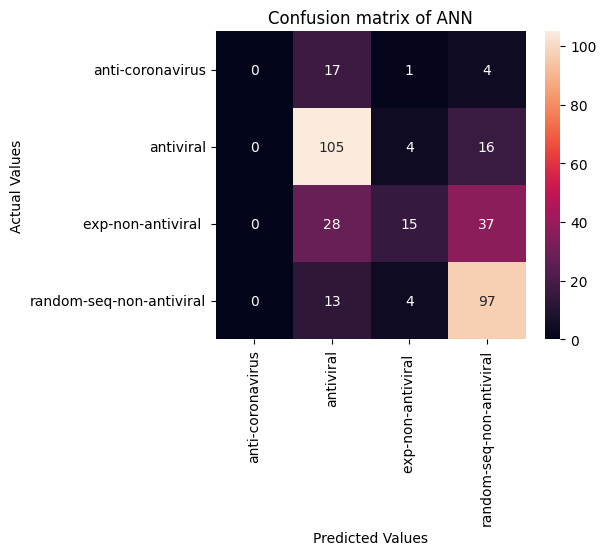

In [67]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot = True, fmt = 'd')
plt.title("Confusion matrix of ANN")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [68]:
print('                   Classification report of ANN')
print('                   -----------------------------')
print('')
print(classification_report(y_test_labels, y_pred_labels))

                   Classification report of ANN
                   -----------------------------

                          precision    recall  f1-score   support

        anti-coronavirus       0.00      0.00      0.00        22
               antiviral       0.64      0.84      0.73       125
       exp-non-antiviral       0.62      0.19      0.29        80
random-seq-non-antiviral       0.63      0.85      0.72       114

                accuracy                           0.64       341
               macro avg       0.47      0.47      0.44       341
            weighted avg       0.59      0.64      0.58       341



C:\Users\JVS Tanish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JVS Tanish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JVS Tanish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [4]:
def features_extractor(file_name):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [5]:
def print_prediction(file_name):
    prediction_feature = features_extractor(file_name) 
    prediction_feature = prediction_feature.reshape(1,50)
    predicted_vector = ANN_model.predict(prediction_feature)
    predicted_vector = predicted_vector.flatten()
    max=predicted_vector[0]
    index=0
    for i in range(1,len(predicted_vector)):
        if(predicted_vector[i]>max):
            max=predicted_vector[i]
            index=i
    class_name=''
    if(index==0): class_name='anti-coronavirus'
    elif(index==1): class_name='antiviral'
    elif(index==2): class_name='exp-non-antiviral'
    else: class_name='random-seq-non-antiviral'
    print("The predicted class is:", class_name, '\n') 

In [18]:
filename = 'music-melodies/melody1517.wav'
print_prediction(filename) 

1/1 [==============================] - 0s 20ms/step
The predicted class is: random-seq-non-antiviral 



In [19]:
filename = 'music-melodies/melody5.wav'
print_prediction(filename) 

1/1 [==============================] - 0s 18ms/step
The predicted class is: antiviral 

